In [1]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
import tqdm

from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils

# Read in data 

In [2]:
DATA_DIR = '/datasets/Public_Datasets/Vizgen_MERFISH_mouse_brain'


data_dir = DATA_DIR

In [3]:
sample_name = 'Vizgen_Slice1_Replicate1'
fdata = os.path.join(data_dir, 'Slice1/Replicate1/cell_by_gene.csv')
fmeta = os.path.join(data_dir, 'Slice1/Replicate1/cell_metadata.csv')

data = pd.read_csv(fdata, index_col=0)
meta = pd.read_csv(fmeta, index_col=0)
print(data.shape, meta.shape)

(78329, 649) (78329, 8)


In [4]:
data.head()

,Oxgr1,Htr1a,Htr1b,Htr1d,Htr1f,Htr2a,Htr2b,Htr2c,Htr4,Htr5a,...,Blank-156,Blank-157,Blank-158,Blank-159,Blank-160,Blank-161,Blank-162,Blank-163,Blank-164,Blank-165
110883424764611924400221639916314253469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135188247894899244046039873973964001182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164766962839370328502017156371562646881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165747897693809971960756442245389760838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260943245639750847364278545493286724628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
meta.head()

,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y
110883424764611924400221639916314253469,0,432.141425,156.563284,4271.326432,151.530484,161.596084,4264.619632,4278.033232
135188247894899244046039873973964001182,0,1351.802616,156.509284,4256.962431,148.290484,164.728084,4247.663631,4266.261232
164766962839370328502017156371562646881,0,1080.653268,159.965284,4228.180431,152.178484,167.752084,4220.555630,4235.805231
165747897693809971960756442245389760838,0,1652.000749,167.579284,4323.868433,158.226484,176.932084,4314.191633,4333.545233
260943245639750847364278545493286724628,0,1343.378642,160.559284,4308.802433,152.394484,168.724084,4301.231633,4316.373233


# Normalize 

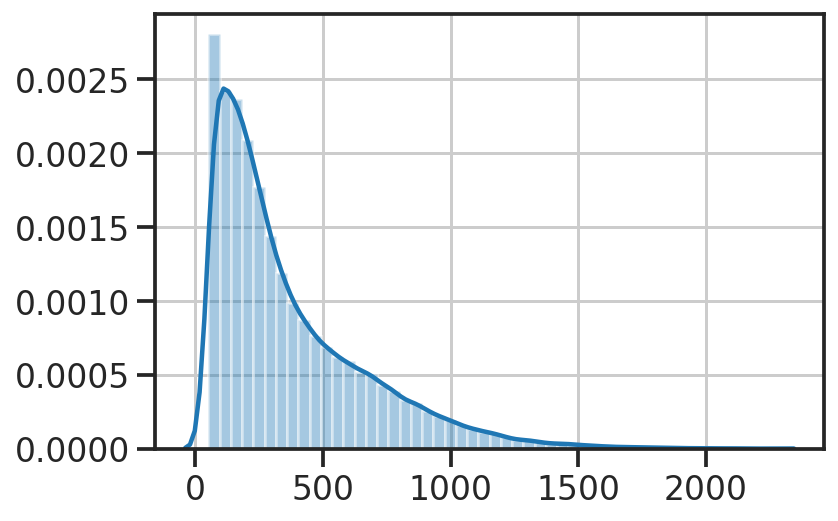

In [6]:
cell_cov = data.sum(axis=1)
sns.distplot(cell_cov)

In [7]:
cell_filter = cell_cov > 50
(~cell_filter).sum()

0

In [8]:
data_norm = data.divide(cell_cov, axis=0)

In [9]:
data_norm.sum(axis=1)

110883424764611924400221639916314253469    1.0
135188247894899244046039873973964001182    1.0
164766962839370328502017156371562646881    1.0
165747897693809971960756442245389760838    1.0
260943245639750847364278545493286724628    1.0
                                          ... 
165273009496786595275688065919008183969    1.0
250474226357477911702383283537224741401    1.0
66106840181174834341279408890707577820     1.0
66165211106933093510165165316573672348     1.0
71051447268015582817266088343399517927     1.0
Length: 78329, dtype: float64

# Visualize 

In [10]:
toplot = meta.join(data_norm)
print(toplot.shape)
toplot.head()

(78329, 657)


,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y,Oxgr1,Htr1a,...,Blank-156,Blank-157,Blank-158,Blank-159,Blank-160,Blank-161,Blank-162,Blank-163,Blank-164,Blank-165
110883424764611924400221639916314253469,0,432.141425,156.563284,4271.326432,151.530484,161.596084,4264.619632,4278.033232,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
135188247894899244046039873973964001182,0,1351.802616,156.509284,4256.962431,148.290484,164.728084,4247.663631,4266.261232,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
164766962839370328502017156371562646881,0,1080.653268,159.965284,4228.180431,152.178484,167.752084,4220.555630,4235.805231,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
165747897693809971960756442245389760838,0,1652.000749,167.579284,4323.868433,158.226484,176.932084,4314.191633,4333.545233,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
260943245639750847364278545493286724628,0,1343.378642,160.559284,4308.802433,152.394484,168.724084,4301.231633,4316.373233,0.0,0.0,...,0.0,0.0,0.0,0.0033,0.0,0.0,0.0,0.0,0.0,0.0


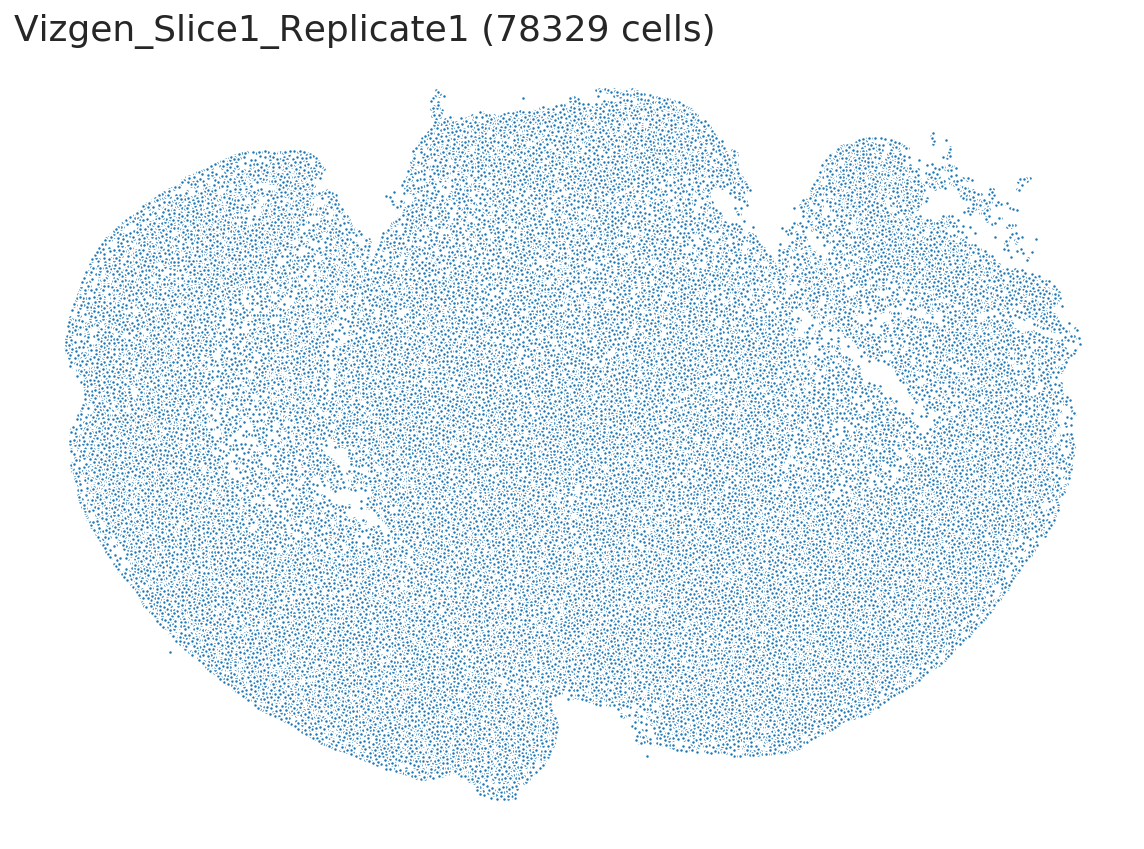

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='center_x', y='center_y', data=meta, 
                s=4, markers=dict(marker_edge_color='none'))
ax.axis('off')
ax.set_aspect('equal')
ax.set_title("{} ({} cells)".format(sample_name, len(meta)), loc='left')
plt.show()

In [13]:
# genes = [
#     'Aqp4',
#     'Drd1',
#     'Drd2',
#     ]
genes = data.columns

output_dir = './results_april17'
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

for gene in tqdm.tqdm(genes):
    output = '{}/{}_{}.png'.format(output_dir, sample_name, gene)
#     print(output)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x='center_x', y='center_y', hue=gene, data=toplot, 
                    s=1, linewidth=0, alpha=0.3,
                    legend=False, 
                    rasterized=True)
    
    sns.scatterplot(x='center_x', y='center_y', hue=gene, data=toplot[toplot[gene]>0], 
                    s=3, linewidth=0, alpha=1,
                    rasterized=True)
    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_title("{} ({} cells)".format(sample_name, len(meta)), loc='left')
    ax.legend(bbox_to_anchor=(1,1))
    snmcseq_utils.savefig(fig, output)
    plt.close()
    
#     break

100%|██████████| 649/649 [34:09<00:00,  3.16s/it]
